In [1]:
%load_ext sql

In [2]:
import csv, sqlite3

conn= sqlite3.connect("database.db")
corsor_obj = conn.cursor()

In [3]:
%sql sqlite:///database.db

Connecting to 'sqlite:///database.db'

In [4]:
#Store the dataset in a Table
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", conn, if_exists="replace", index=False, method='multi')

78

In [5]:
# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

#### Verify that the table creation was successful by making a basic query like:

In [6]:
%sql select * from chicago_socioeconomic_data

Running query in 'sqlite:///database.db'

ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


#### task-1: How many rows are in the dataset?

In [7]:
%sql select count(*) from chicago_socioeconomic_data

Running query in 'sqlite:///database.db'

count(*)
78


#### task-2: How many community areas in Chicago have a hardship index greater than 50.0?

In [8]:
%sql select count(*) from chicago_socioeconomic_data where hardship_index > 50.05

Running query in 'sqlite:///database.db'

count(*)
38


#### task-3: What is the maximum value of hardship index in this dataset?

In [32]:
highest_hardship_index = %sql select max(hardship_index) from chicago_socioeconomic_data;
highest_hardship_index = highest_hardship_index[0][0]
highest_hardship_index

Running query in 'sqlite:///database.db'

98.0

#### task-4: Which community area which has the highest hardship index?

In [33]:

community_area_name_of_highest_hardship_index= %sql select community_area_name from chicago_socioeconomic_data where hardship_index= :highest_hardship_index;

community_area_name_of_highest_hardship_index= community_area_name_of_highest_hardship_index[0][0]
community_area_name_of_highest_hardship_index


Running query in 'sqlite:///database.db'

'Riverdale'

#### task-5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [34]:
%sql select community_area_name, per_capita_income_ from chicago_socioeconomic_data where per_capita_income_ > 60000;

Running query in 'sqlite:///database.db'

community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


#### task-6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables

Running query in 'sqlite:///database.db'

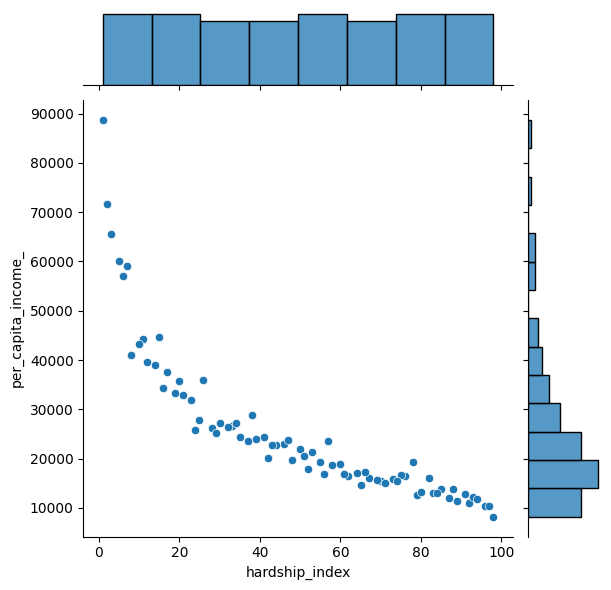

In [38]:
import seaborn as sns
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='hardship_index',y='per_capita_income_', data=income_vs_hardship.DataFrame())

##### WE can see that as Per Capita Income decreases as the Hardship Index rises. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a <b>negative correlation<b> between the two variables. 

### percent_households_below_poverty_VS_per_capita_income_

Running query in 'sqlite:///database.db'

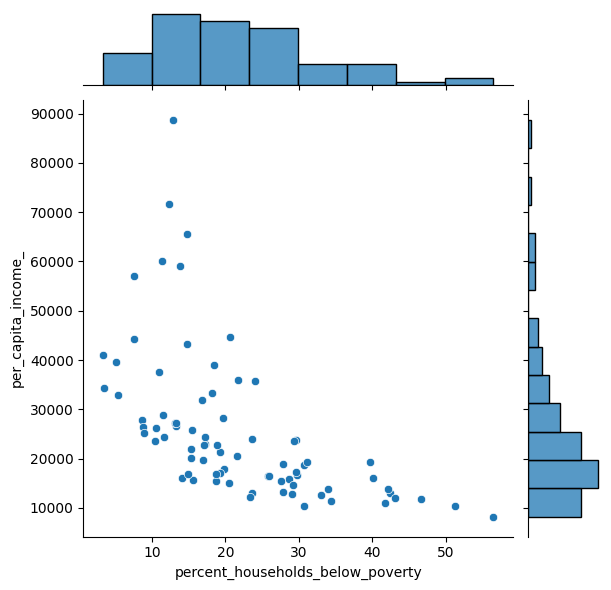

In [40]:
percent_households_below_poverty_vs_per_capita_income_ = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;

plot = sns.jointplot(x='percent_households_below_poverty',y='per_capita_income_', data=percent_households_below_poverty_vs_per_capita_income_.DataFrame())

### percent_aged_16_unemployed_VS_per_capita_income_

Running query in 'sqlite:///database.db'

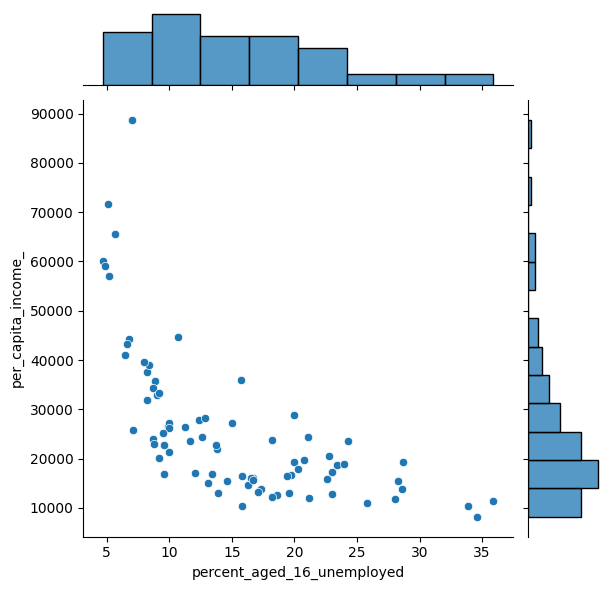

In [42]:
percent_aged_16_unemployed_vs_per_capita_income_ = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;

plot = sns.jointplot(x='percent_aged_16_unemployed',y='per_capita_income_', data=percent_aged_16_unemployed_vs_per_capita_income_.DataFrame())